# importing Necessary Libraries

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle as pkl
from sklearn.metrics import r2_score

In [307]:
# collect the dataset from kaggle and which is in csv file 
#convert it to pandas DataFrame
insurance = pd.read_csv(r"C:\Users\Asus\Downloads\insurance.csv")

In [308]:
#first few rows 
#based upon this input columns we are going to predict the medical insurance premium
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [309]:
# some Basic Data Analysis

In [310]:
#information about the column
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [311]:
# out of 7 columns 4 columns are numerical 
#we get the statistical summary about the numerical columns
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [312]:
#we look how many rows and columns in data 
insurance.shape

(1338, 7)

In [313]:
#there are total 1338 rows and 7 columns .
#out of which 4 columns are numerical 

In [314]:
#checking the null value in the columns 
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [315]:
#there is no null value in any columns 
#so our data is completely good and  clean

In [316]:
#now checking how the data is distributed by checking the numerical column

<Figure size 600x600 with 0 Axes>

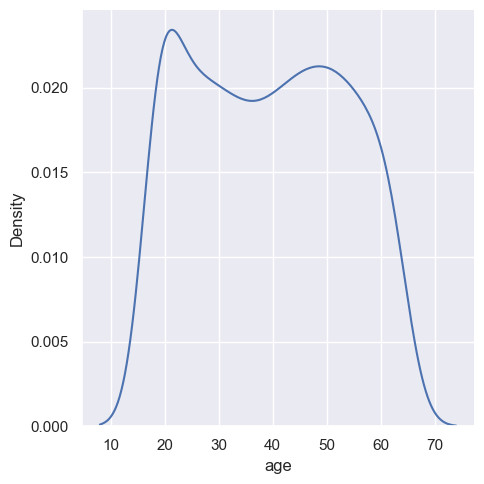

In [317]:
#Data Distribution for Numerical Column - Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'],kind="kde")
plt.show()

In [318]:
insurance['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [319]:
#the age of the column 20 is morecompare to the other ages
#the age column distributed from age 18 to 64 
#64 is the maximum value

<Figure size 600x600 with 0 Axes>

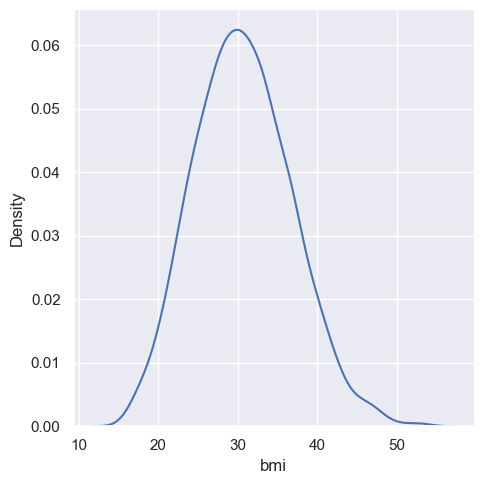

In [320]:
#Data Distribution for Numerical Column - BMI
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['bmi'],kind="kde")
plt.show()

In [321]:
#bmi range max distributed between 30 ato 35 
#after bmi  40  may be they are overweight 

<Figure size 600x600 with 0 Axes>

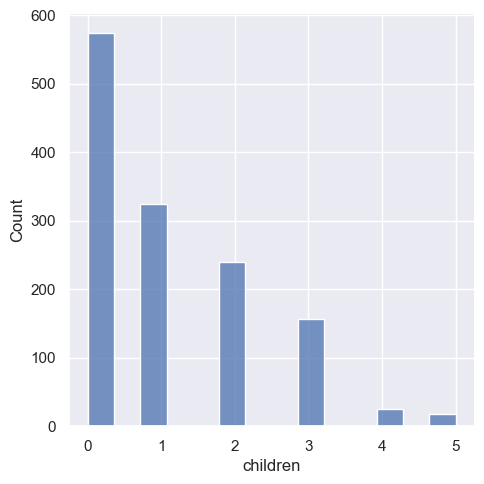

In [322]:
#Data Distribution for Numerical Column - children
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['children'])
plt.show()

In [323]:
insurance["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

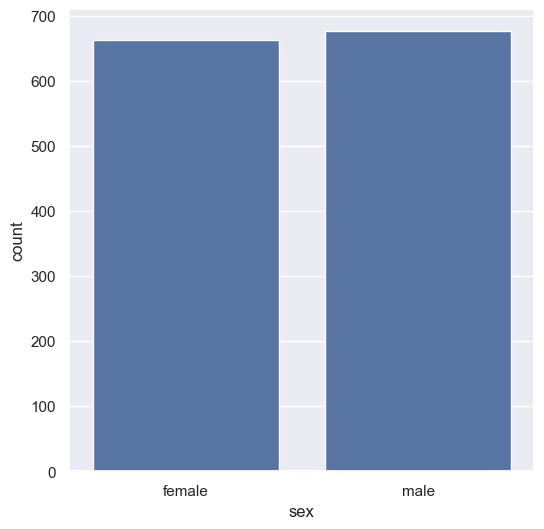

In [324]:
#Column charts for Categorical Column - sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['sex'], data = insurance)
plt.show()

In [325]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

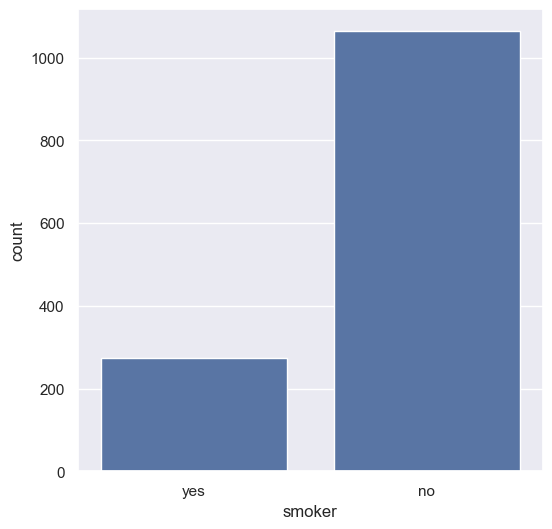

In [326]:
#Column charts for Categorical Column - smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['smoker'], data = insurance)
plt.show()

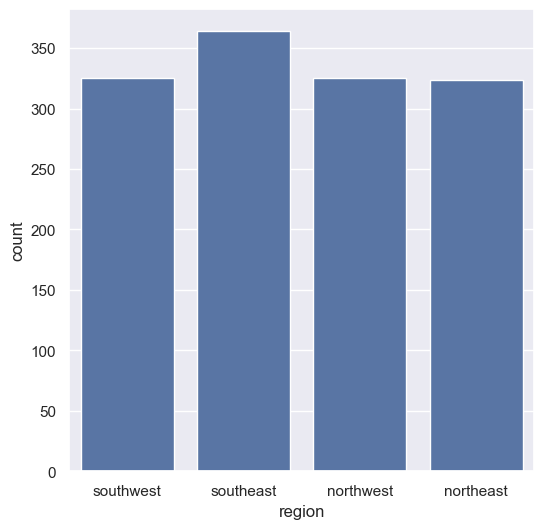

In [327]:
#Column charts for Categorical Column - region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['region'], data = insurance)
plt.show()

In [328]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [329]:
#except smoker column all this value are equally distributed 
#so our data is good with the data distribution and analysis

Now we processs the data 

Encoding the categorical features

In [330]:
#we have 3 categorial column we have to convert it into numerical column 
#convert sex column to numerical column 

insurance.replace({'sex':{'female':0, 'male':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9264\974119353.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'sex':{'female':0, 'male':1}}, inplace=True)


In [331]:
#convert smoker column to numerical column 
insurance.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9264\3038721559.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)


In [332]:
#convert region column to numerical column 
insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9264\809604397.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


In [333]:
#we redict the charges . so out put column will be charges and other than charges column all columns are input columns
input_data = insurance.drop(columns='charges')
output_data = insurance['charges']

In [334]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [335]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [336]:
#now we divide input data as 20% for model test and 80% for training
#now we divide output data as 20% for model test and 80% for training
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2,random_state=42)

In [337]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [338]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(1338,) (1070,) (268,)


In [339]:
# we are done with the spliting of the dataset

In [340]:
#Model Creation 

model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [341]:
#Training Model

model.fit(input_train_data, output_train_data)

RandomForestRegressor(max_depth=7)

In [342]:
#we have created a random forest model 

In [343]:
#predicting values with Test Dataset

test_data_predictions = model.predict(input_test_data) 

In [344]:
#Evaluating Model

In [345]:
r2_score(test_data_predictions,output_test_data)

0.8613543408506544

In [346]:
#age,sex,bmi,children,smoker,region
input_data = (38, 0,28, 3, 0, 1)
#convert into numpy array
input_data_array = np.asarray(input_data)
print(input_data_array)

input_data_array = input_data_array.reshape(1,-1)
print(input_data_array)

[38  0 28  3  0  1]
[[38  0 28  3  0  1]]


In [347]:
insurance_premium = model.predict(input_data_array)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [348]:
insurance_premium[0]

6923.3030934617445

In [349]:
#age and smoker play the important role to predict the premium

In [350]:
#now we create a pkl  model 

In [351]:
pkl.dump(model, open('MIPM.pkl','wb'))

In [97]:
input_test_data

,age,sex,bmi,children,smoker,region
861,38,0,28.000,3,0,1
256,56,1,33.630,0,1,3
1199,31,0,25.800,2,0,1
356,46,1,43.890,3,0,0
737,26,1,23.700,2,0,1
...,...,...,...,...,...,...
604,19,0,28.310,0,1,3
246,60,0,38.060,0,0,0
747,19,1,21.755,0,0,3
1164,41,0,28.310,1,0,3


In [98]:
#when we take age=38,sex is female,bmi is 28,children are 3,not smoker ,region is southwest
#the result is  closer to the actual value
#our model performance is good 

In [99]:
output_test_data

861      7151.09200
256     43921.18370
1199     4934.70500
356      8944.11510
737      3484.33100
           ...     
604     17468.98390
246     12648.70340
747      1627.28245
1164     7153.55390
645     10141.13620
Name: charges, Length: 268, dtype: float64